# 🧑‍🏫 Task 1 Part 2: Build Your Own Logistic Regression Model for Sentiment Analysis
In this exercise, you will build a **logistic regression model** from scratch to perform sentiment analysis.

**Objective:** Implement all key components of an ML pipeline (except for data handling).

**Allowed Libraries:** `pandas`, `numpy`

**Not Allowed:** Any pre-built ML algorithms or functions like `LogisticRegression` from `sklearn`.

Follow the instructions step-by-step and answer the questions!

## Step 1: Load the Data
**Task:** Use `pandas` to load the dataset from a file named `IMDB_reviews.csv`.

> **Hint:** Use `pd.read_csv()` to load the file and display the first 5 rows.

**Question:** What are the key features and the target variable in this dataset?

The key features are the text reviews, and the target variable is the sentiment label (i.e., positive or negative)

In [3]:
import pandas as pd
# Load the dataset and display the first few rows
data = pd.read_csv('/kaggle/input/log-reg-dataset/IMDB_Dataset.csv')
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


## Step 3: Tokenization and Text Cleaning
**Task:** Implement your own function to:
1. Convert all text to lowercase.
2. Remove punctuation and special characters.
3. Split the text into words (tokenization).

> **Hint:** Use Python string methods and list comprehensions.

**Question:** Why is tokenization important for text-based models?

Tokenization breaks text into smaller components (words), enabling the model to analyze and learn from individual words, which is essential for understanding and processing natural language data.

In [4]:
#Write your own tokenizer function
import re

def tokenize_and_clean(text):
    # Convert text to lowercase
    text = text.lower()
    # Removes everything except space and characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize by splitting the text into words
    tokens = text.split()
    return tokens

# Test the function on a sample review
sample_review = data['review'][0]  
print(tokenize_and_clean(sample_review))


['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'youll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'mebr', 'br', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'wordbr', 'br', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', '

## Step 4: Create a Vocabulary
**Task:** Create a **vocabulary** (a list of unique words) from the tokenized dataset.

> **Hint:** Use a set to store unique words, then convert it to a list.

**Question:** How does vocabulary size affect model performance?

In [5]:
# Your code here
def build_vocabulary(data):
    vocab = set()
    for review in data['review']:
        tokens = tokenize_and_clean(review)
        vocab.update(tokens)
    return list(vocab)


vocabulary = build_vocabulary(data)
print(f"Vocabulary size: {len(vocabulary)}")

Vocabulary size: 181066


A larger vocabulary means more information for the model to train on, but it can increase complexity and computational power and might also cause overfitting.

## Step 5: Implement Word Count
**Task:** Calculate and store the number of times each word appears in a particular review for all reviews

In [6]:
# Your code here
# Example: Write functions to calculate word counts
import numpy as np
from collections import Counter
from scipy.sparse import csr_matrix

# Tokenize and clean the reviews
preprocessed_reviews = [tokenize_and_clean(review) for review in data['review']]

# Build the vocabulary and vocabulary index mapping
vocab_to_index = {word: i for i, word in enumerate(vocabulary)}

def word_count(review, vocab_to_index):
    """Converts a review into a word count feature vector based on the vocabulary index."""
    tokens = tokenize_and_clean(review)
    word_counts = Counter(tokens)
    
    # Create sparse row representation for the review
    row, col, data_val = [], [], []
    for word, count in word_counts.items():
        if word in vocab_to_index:
            row.append(0)  # single row for one review
            col.append(vocab_to_index[word])
            data_val.append(count)
    
    # Convert to sparse matrix with shape (1, len(vocab_to_index)) and return dense array
    review_sparse = csr_matrix((data_val, (row, col)), shape=(1, len(vocab_to_index)))
    return review_sparse.toarray()

# Convert all training reviews into word count feature vectors
rows, cols, data_vals = [], [], []
for i, tokens in enumerate(preprocessed_reviews):
    word_counts = Counter(tokens)
    for word, count in word_counts.items():
        if word in vocab_to_index:
            rows.append(i)
            cols.append(vocab_to_index[word])
            data_vals.append(count)

# Final training feature matrix
X_sparse = csr_matrix((data_vals, (rows, cols)), shape=(len(preprocessed_reviews), len(vocab_to_index)))
X = X_sparse.toarray()

# Prepare target labels
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values



## Step 6: Train-Test Split
**Task:** Split the data into **80% training** and **20% testing** sets.

> **Hint:** Use `numpy` or list slicing to split the data manually.

**Question:** Why do we need to split the data for training and testing?

it will help us know if the model will work well on unseen data by training it only on a fraction o fthe training set and then testing it on the remaining part and comparing the actual values.

In [7]:
# Your code here
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

## Step 7: Building the Logistic Regression Model (Divided Steps)

### Part 1: The Prediction functions
The **prediction function** returns the predicted value of the data point using the weights and the bias. It uses the sigmoid function to convert the prediction into a value in the range of 0 to 1.

**Task:** Implement the sigmoid and prediction functions

In [8]:
def sigmoid(x):
 return 1 / (1 + np.exp(-x))

def lr_prediction(weights,	bias,	features):
 return sigmoid(np.dot(features, weights) + bias)

### Part 2: Implementing the Error functions
**Task:** Use the gradient update rules to train the logistic regression model over multiple epochs.

In [9]:
def log_loss(weights, bias, features, label):
    prediction = lr_prediction(weights, bias, features)
    # Clip the prediction to avoid log(0)
    prediction = np.clip(prediction, 1e-15, 1 - 1e-15)
    return -label * np.log(prediction) - (1 - label) * np.log(1 - prediction)

def	total_log_loss(weights,	bias,	X,	y):
    losses = [log_loss(weights, bias, X[i], y[i]) for i in range(len(y))]
    return np.mean(losses)

### Part 1: Update Weights
The **Update_Weights** adjusts weights and bias based on whether points are correctly or incorrectly classified, It is a simple method of improving the model at every iteration:
1. **Correctly classified points:** Move the line **away** from the point.
2. **Incorrectly classified points:** Move the line **towards** the point.

**Task:** Implement the gradient update function based on these rules.

In [10]:
#Your Code
def	lr_update_weights(weights,	bias,	features,	label,	learning_rate	=	0.01):
    prediction = lr_prediction(weights, bias, features)
    error = prediction - label
    
    # Gradient calculation
    weights -= learning_rate * error * features
    bias -= learning_rate * error
    return weights, bias

### Part 2: Implementing the Logistic Regression Algorithm
**Task:** Use the function to update weights to train the logistic regression model over multiple epochs. Keep track of the total error for each epoch. You will later plot these errors.

In [11]:
def lr_algorithm(features, labels, learning_rate=0.01, epochs=200, tolerance=1e-4):
    weights = np.zeros(features.shape[1])  
    bias = 0  
    errors = []  # List to store total error for each epoch

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(labels)):
            weights, bias = lr_update_weights(weights, bias, features[i], labels[i], learning_rate)
            prediction = lr_prediction(weights, bias, features[i])
            prediction = np.clip(prediction, 1e-15, 1 - 1e-15)
            total_error += -(labels[i] * np.log(prediction) + (1 - labels[i]) * np.log(1 - prediction))
        
        # Calculate and print average error for the epoch
        average_error = total_error / len(labels)
        errors.append(average_error)
        print(f"Epoch {epoch + 1}, Total Error: {average_error}")
        
        # Early stopping condition
        if epoch > 0 and abs(errors[-1] - errors[-2]) < tolerance:
            print("Early stopping due to minimal error change.")
            break

    return weights, bias, errors



## Step 8: Evaluate Your Model
**Task:** Calculate the accuracy of the model. Compare the predicted labels with the actual labels.

> **Hint:** Use the formula for accuracy: (Correct Predictions / Total Predictions) * 100

**Question:** Which metric—accuracy, precision, or recall—is most important for sentiment analysis?

accuracy can give misleading results if the data is imbalanced. Hence, balanced accuracy or f1 score, which balances both recall and precision is a better measure for the reults.

In [12]:
# Your code here
def predict(features, weights, bias):
    return [1 if lr_prediction(weights, bias, x) >= 0.5 else 0 for x in features]

#  accuracy of the model
def calculate_accuracy(predictions, labels):
    correct_predictions = sum([1 for pred, actual in zip(predictions, labels) if pred == actual])
    accuracy = (correct_predictions / len(labels)) * 100
    return accuracy
weights, bias, errors = lr_algorithm(X_train, y_train)

# Predict and calculate accuracy on the test set
predictions = predict(X_test, weights, bias)
accuracy = calculate_accuracy(predictions, y_test)
print(f"Model Accuracy: {accuracy}%")

Epoch 1, Total Error: 0.1575869002144891
Epoch 2, Total Error: 0.11103579278135314
Epoch 3, Total Error: 0.09298304226160668
Epoch 4, Total Error: 0.08034758813692199
Epoch 5, Total Error: 0.07043111648992878
Epoch 6, Total Error: 0.06332843102754215
Epoch 7, Total Error: 0.061098789647492664
Epoch 8, Total Error: 0.05527972513994439
Epoch 9, Total Error: 0.050878281805462805
Epoch 10, Total Error: 0.049825596808255
Epoch 11, Total Error: 0.046867643771727814
Epoch 12, Total Error: 0.04430823743398261
Epoch 13, Total Error: 0.04304190515408926
Epoch 14, Total Error: 0.04131377691022605
Epoch 15, Total Error: 0.03997096425070524
Epoch 16, Total Error: 0.038648703880863756
Epoch 17, Total Error: 0.037217619992804395
Epoch 18, Total Error: 0.036243002782520045
Epoch 19, Total Error: 0.03521242911740947
Epoch 20, Total Error: 0.03439464555828805
Epoch 21, Total Error: 0.03363829323838768
Epoch 22, Total Error: 0.0328710918654083
Epoch 23, Total Error: 0.032168535486572815
Epoch 24, Total E

## Step 8: Visualize the Errors  
**Task:** Create a scatter plot of the total errors over the training epochs. The plot should show a gradual decrease in errors, stabilizing as the model converges.

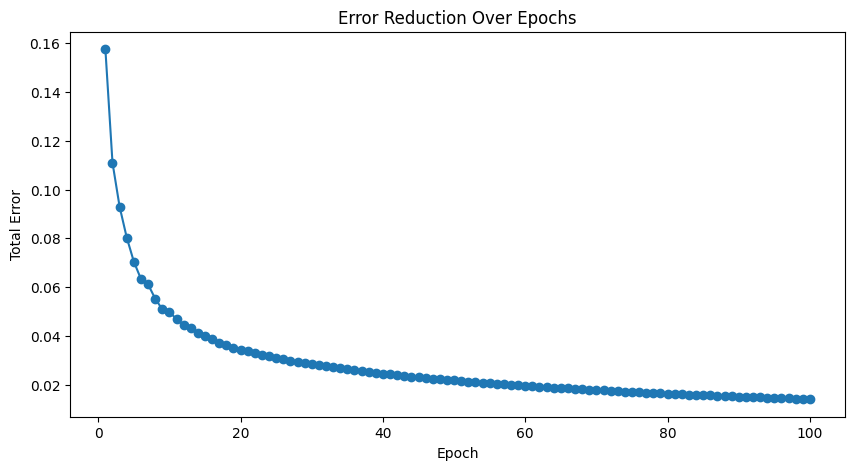

In [13]:
#Your code here
import matplotlib.pyplot as plt

# Plotting total errors over epochs
def plot_errors(errors):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(errors) + 1), errors, marker='o', linestyle='-')
    plt.xlabel('Epoch')
    plt.ylabel('Total Error')
    plt.title('Error Reduction Over Epochs')
    plt.show()


plot_errors(errors)

## Step 9: Make Predictions on New Data
**Task:** Use your trained model to predict the sentiment of the following review:

> _"The movie was absolutely fantastic and kept me hooked till the end."_

**Question:** What challenges might arise when predicting on new data?

In [14]:
# Your code here
# New data for prediction
# New review for prediction
new_review = "The movie was absolutely fantastic and kept me hooked till the end."

# Converting new review to word count feature vector
new_review_features = word_count(new_review, vocab_to_index)
new_prediction = lr_prediction(weights, bias, new_review_features)

#result
sentiment = "positive" if new_prediction >= 0.5 else "negative"
print(f"Predicted Sentiment: {sentiment}")


Predicted Sentiment: positive


## Step 10: Wrap-up
1. How well did your model perform?
2. What challenges did you face while implementing it from scratch?
3. What improvements would you suggest for the future?

the accuracy is 89% and it gave the correct result for the new data. The error has also decreased a lot during training and hence, we can say it has a good result.
One challenge was that i had forgotten to include early stopping initially. Also the log values were reaching to 0, so i had to put a clipping condition for that. 
But other than that, there were no difficulties or challenges.
Improvements: It would be better to train in batches, than normal gradient descent.
Do regularization and balancing of the sentiments.
Try different metrics to evaluate the model than just accuracy.
We could also use a learning rate decay instead of a fixed one.

### Notes (if any):